In [1]:
%matplotlib notebook

import os
import math
import numpy as np
import pylab

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import image as mpimg

from IPython.display import display
from IPython.display import Image as Image2

import PIL
from PIL import ImageChops, ImageFilter, Image, ImageStat

numberImages = 4
pre = 3

site1 = []
site2 = []
#imPNG = []

def create(emptyList, string):
    for i in range(0, numberImages):
        emptyList.append(str(string) + '_' + str(i) + '.jpg')
#    imPNG.append('image' + str(i) + '.png')

create(site1, "site1")
create(site2, "site2")

def brightness0( im_file ):
    im = Image.open(im_file).convert('L')
    stat = ImageStat.Stat(im)
    return stat.mean[0]

def brightness1( im_file ):
    im = Image.open(im_file).convert('L')
    stat = ImageStat.Stat(im)
    return stat.rms[0]

def brightness2( im_file ):
    im = Image.open(im_file)
    stat = ImageStat.Stat(im)
    r,g,b = stat.mean
    return math.sqrt(0.241*(r**2) + 0.691*(g**2) + 0.068*(b**2))

def brightness3( im_file ):
    im = Image.open(im_file)
    stat = ImageStat.Stat(im)
    r,g,b = stat.rms
    return math.sqrt(0.241*(r**2) + 0.691*(g**2) + 0.068*(b**2))

def brightness4( im_file ):
    im = Image.open(im_file)
    stat = ImageStat.Stat(im)
    gs = (math.sqrt(0.241*(r**2) + 0.691*(g**2) + 0.068*(b**2)) 
        for r,g,b in im.getdata())
    return sum(gs)/stat.count[0]

def brightnessN(im_file, n):
    ret = None
    if n == 0:
        ret = round(brightness0(im_file), pre)
        
    elif n == 1:
        ret = round(brightness1(im_file), pre)
        
    elif n == 2:
        ret = round(brightness2(im_file), pre)
        
    elif n == 3:
        ret = round(brightness3(im_file), pre)
        
    elif n == 4:
        ret = round(brightness4(im_file), pre)
        
    return ret
        
def allBrightness(imJPG):
    brightnessArray = []
#    brightnessMatrix = []
#    matrix = np.array([brightnessMatrix])
    for j in range(0,5):
        for i in range(0, numberImages):
            brightnessArray.append(brightnessN(imJPG[i], j))
    brightnessMatrix = np.array([brightnessArray])
    print brightnessMatrix.reshape(5,4)

In [2]:
allBrightness(site1), allBrightness(site2)

[[  93.384  132.157   87.069  137.423]
 [ 108.436  143.723   98.593  142.784]
 [  94.787  132.754   90.718  139.06 ]
 [ 109.538  144.815  103.538  145.95 ]
 [  95.497  133.397   92.123  140.622]]
[[ 152.461  125.66    94.659  100.7  ]
 [ 161.783  142.527  109.062  110.885]
 [ 153.202  126.187   97.027  102.706]
 [ 162.396  143.17   111.867  113.832]
 [ 153.308  126.588   97.71   103.724]]


(None, None)

In [3]:
#Gives which pixels of an image are blue
def bluePixels(im_file):
    im = Image.open(im_file)
    array = np.asarray(im)
    dim = array.shape
    #First an array that would result in an image fully white
    blackWhite = np.zeros(dim, dtype = 'uint8')
    blackWhite = 255 - blackWhite
    #Every pixel is tested, and if it is found blue, the corresponding pixel in blackWhite
    #is changed to black
    for i in range(0,dim[0]):
        for j in range(0, dim[1]):
            if closeToBlue(array[i,j]):
                blackWhite[i,j] = (0,0,0)
    return Image.fromarray(blackWhite)

def visualiseBlue(image, imageBlue):
    pixels = np.asarray(imageBlue)
    imgPixels = np.asarray(image)
    pixels.flags.writeable = True
    pixels[pixels == 0] = imgPixels[pixels == 0]
    Image.fromarray(pixels).show()

#Given a table of 0s and 1s, the function returns a list of the group of 1s
#closest to the top
def findTopGroup(table):
    res = skimage.measure.label(table)
    res[res!=1] = 0
    return res

#Tests a pixel in RGB format and returns True if it is some shade of blue or gray
def closeToBlue(pixelRGB):
    res = False

    if pixelRGB[2]>pixelRGB[1] and pixelRGB[2]>pixelRGB[0]:
        res = True
    
    return res

#Gives which pixels of an image are blue
#def convertBlue(im_file):
#    im = Image.open(im_file)
#    array = np.asarray(im)
#    dim = array.shape
#    #First an array that would result in an image fully white
#    blackWhite = np.zeros(dim, dtype = 'uint8')
#    blackWhite = 255 - blackWhite
#    #Every pixel is tested, and if it is found blue, the corresponding pixel in blackWhite
#    #is changed to black
#    for i in range(0,dim[0]):
#        for j in range(0, dim[1]):
#            if closeToBlue(array[i,j]):
#                blackWhite[i,j] = (0,0,0)
#    return Image.fromarray(blackWhite).crop((0, 30, dim[0], dim[1]-30))

#for blobs in [red_blobs, blue_blobs]:
#    all_labels, n = measure.label(blobs, return_num=True)
#    for i in range(n):
#        blob = np.ma.masked_where(all_labels != i, all_labels)
#        m = np.repeat(blob.mask,3,axis=2)
#        ft = np.ma.masked_array(img, mask=m)

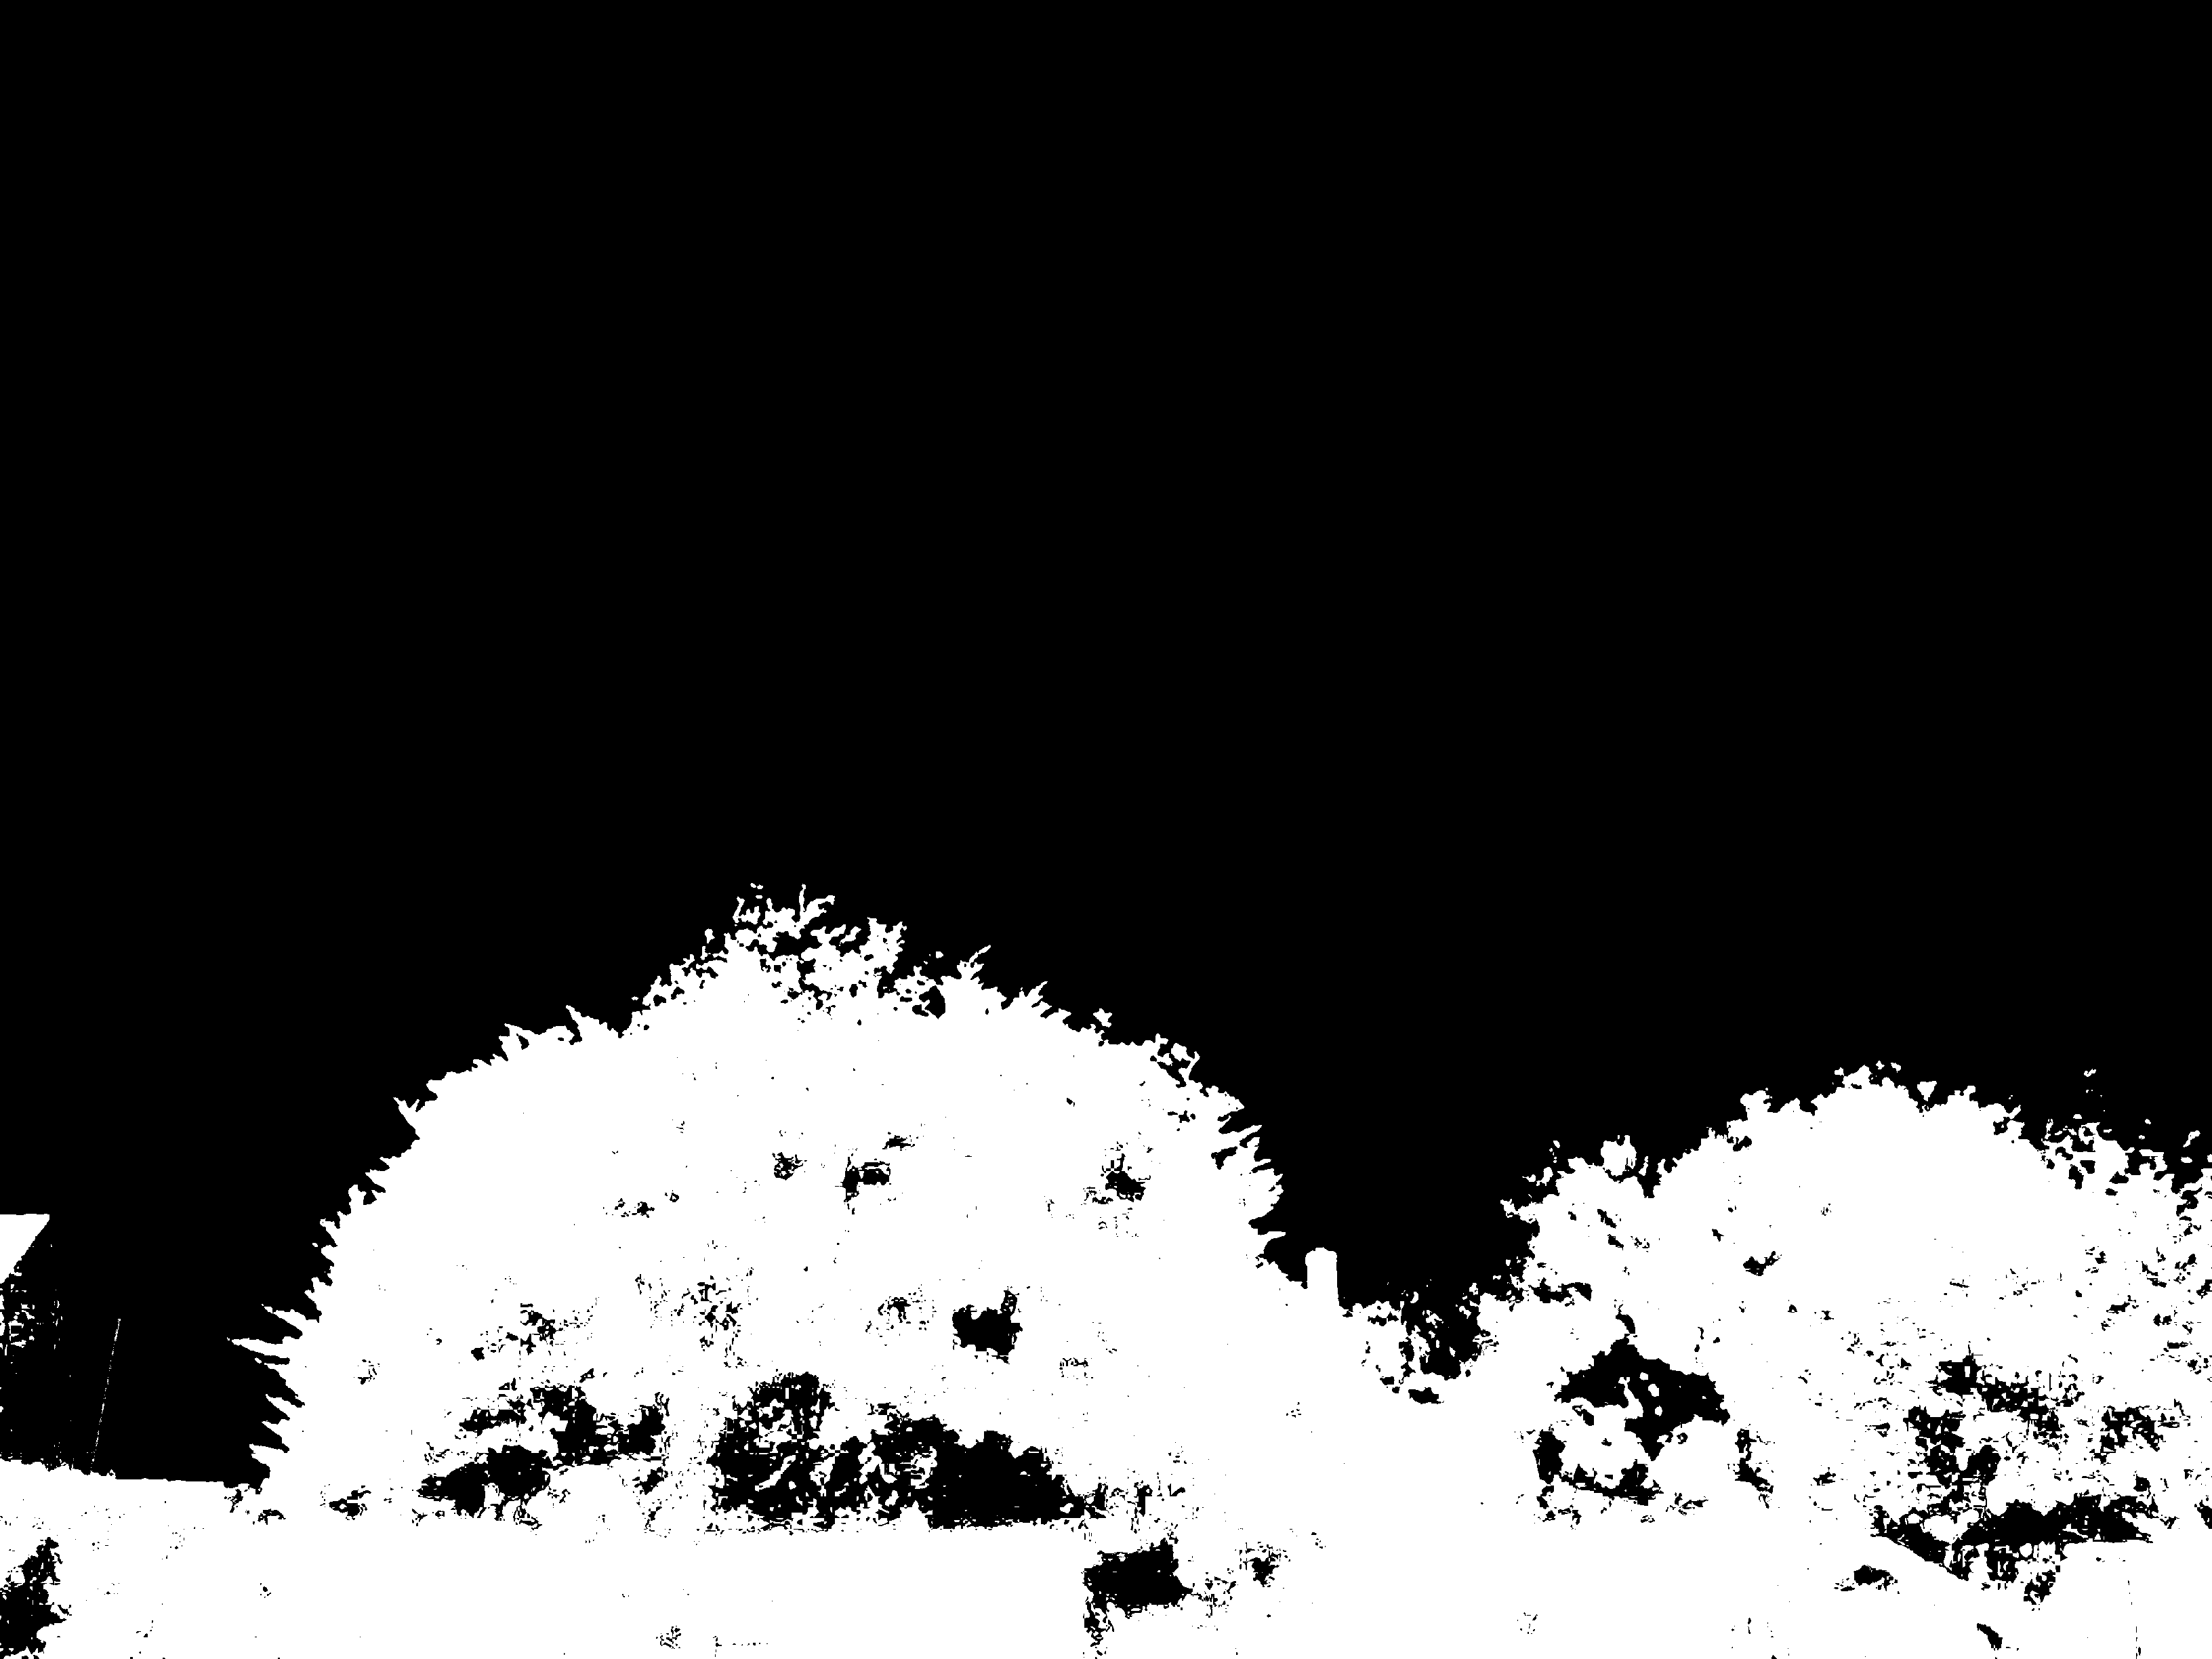

In [4]:
bluePixels("site2_3.jpg")

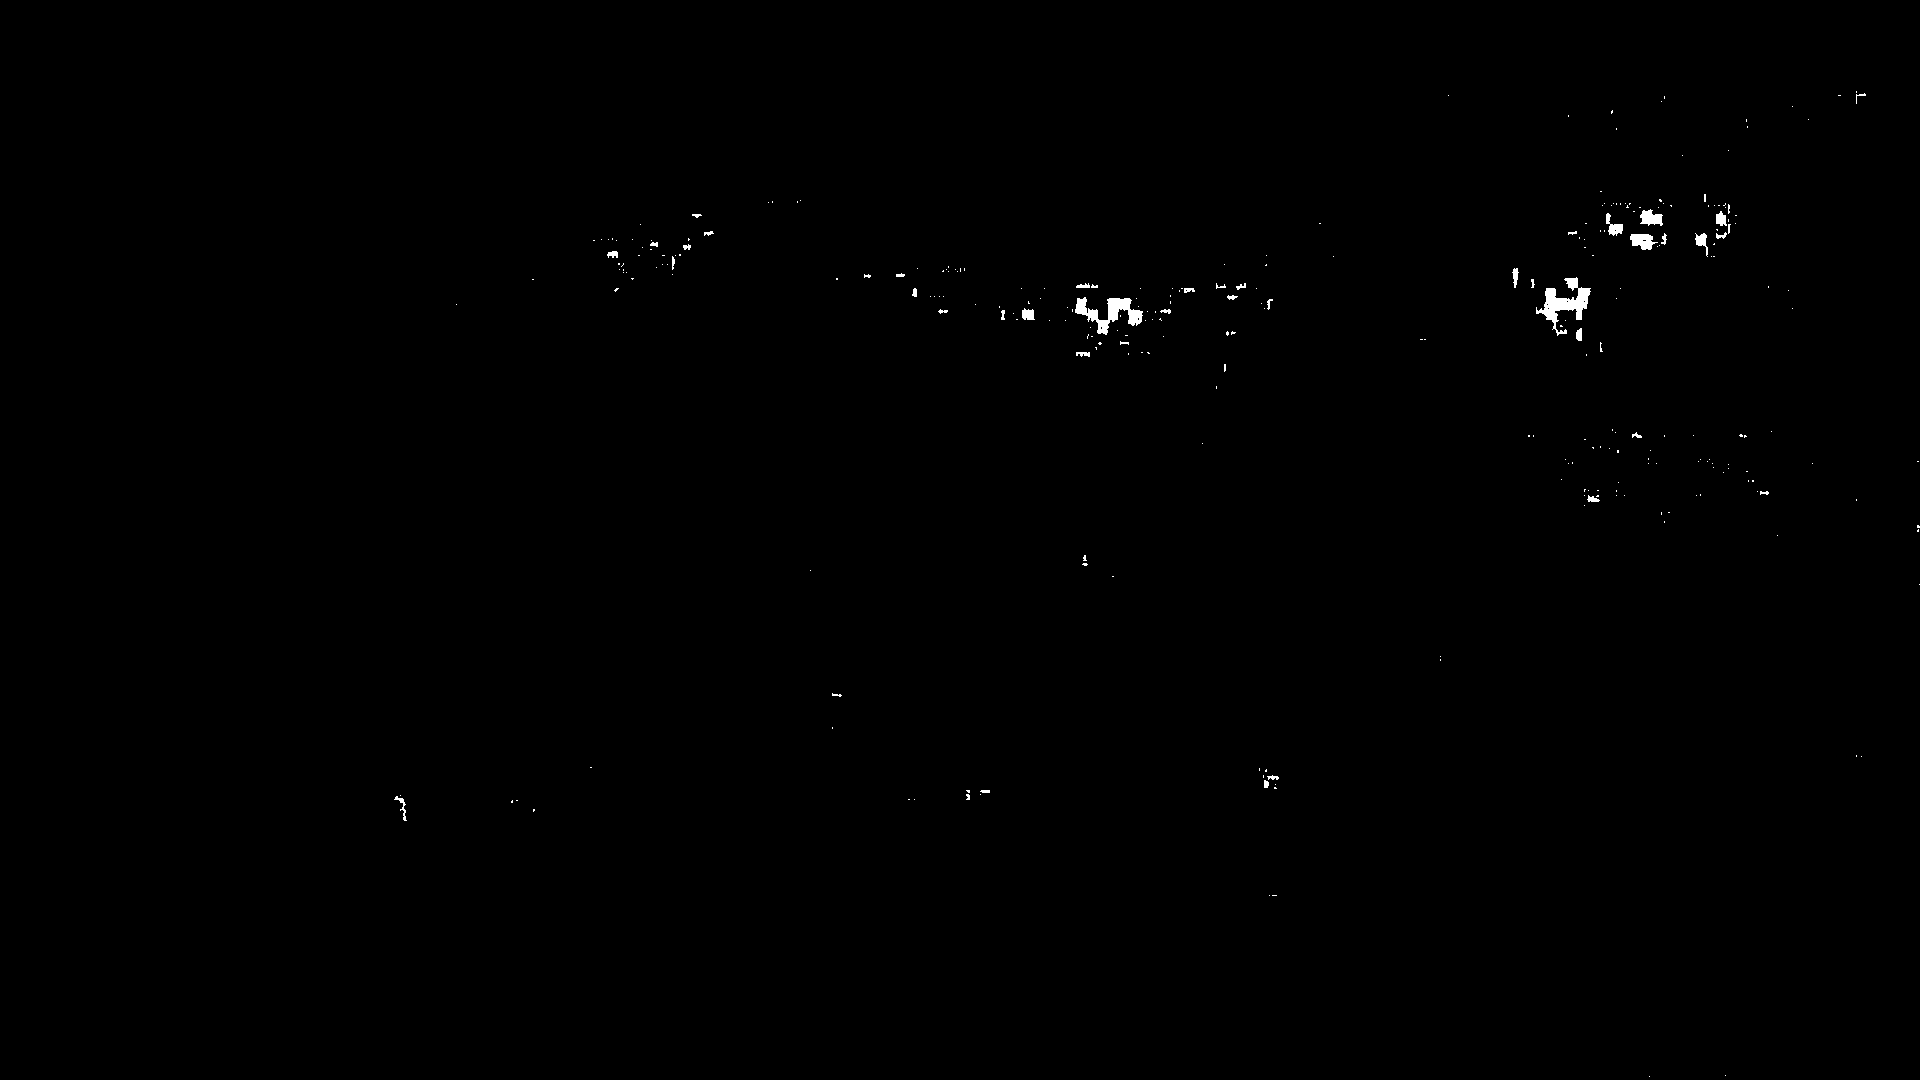

In [5]:
bluePixels("sky3.jpg")

In [6]:
def hexencode(rgb):
    r=rgb[0]
    g=rgb[1]
    b=rgb[2]
    return '#%02x%02x%02x' % (r,g,b)

def barPlotImageNormalise(im_file):
    im = Image.open(im_file)
    w, h = im.size  
    colors = im.getcolors(w*h)
    
    norm = 0
    for i in range(len(colors)):
        norm = norm + colors[i][0]
    
    for idx, c in enumerate(colors):
        plt.bar(idx, c[0]/norm, color=hexencode(c[1]), edgecolor=hexencode(c[1]))
        
    axes = plt.gca()
    axes.set_xlim([0,2500])
    axes.set_ylim([0,0.0005])
    
    plt.show()
    
def barPlotImage(im_file):
    im = Image.open(im_file)
    w, h = im.size  
    colors = im.getcolors(w*h)

    for idx, c in enumerate(colors):
        plt.bar(idx, c[0], color=hexencode(c[1]), edgecolor=hexencode(c[1]))

    plt.show()

<IPython.core.display.Javascript object>


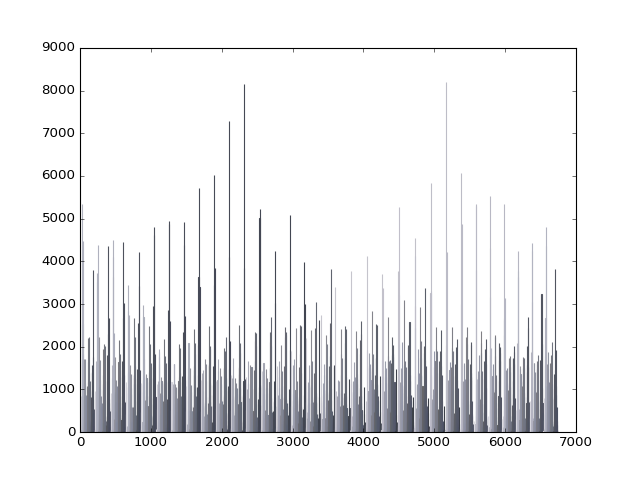

In [7]:
barPlotImage("sky3.jpg")